In [1]:
! pip install scikit-learn==1.2.2


In [2]:
from pandas import read_csv
import pandas as pd
import sklearn

# Load the data into a pandas DataFrame
mushrooms_df = read_csv('/workspaces/ml-webapp-using-streamlit-tutorial-omass/mushrooms.csv')

#Show the first few rows of the DataFrame
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/workspaces/ml-webapp-using-streamlit-tutorial-omass/mushrooms.csv')

# List of feature names (excluding the target variable 'class' if it's in the dataset)
features = [column for column in df.columns if column != 'class']

# Encoding categorical features using LabelEncoder (if not already done)
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Splitting the data into features and labels
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Assuming the LabelEncoder is fitted to all features
label_encoders = {feature: LabelEncoder().fit(df[feature]) for feature in features}

# Determine the min and max numerical values for each feature after encoding
numerical_feature_ranges = {
    feature: (min(label_encoders[feature].transform(df[feature].unique())),
              max(label_encoders[feature].transform(df[feature].unique())))
    for feature in features
}

print(numerical_feature_ranges)


{'cap-shape': (0, 5), 'cap-surface': (0, 3), 'cap-color': (0, 9), 'bruises': (0, 1), 'odor': (0, 8), 'gill-attachment': (0, 1), 'gill-spacing': (0, 1), 'gill-size': (0, 1), 'gill-color': (0, 11), 'stalk-shape': (0, 1), 'stalk-root': (0, 4), 'stalk-surface-above-ring': (0, 3), 'stalk-surface-below-ring': (0, 3), 'stalk-color-above-ring': (0, 8), 'stalk-color-below-ring': (0, 8), 'veil-type': (0, 0), 'veil-color': (0, 3), 'ring-number': (0, 2), 'ring-type': (0, 4), 'spore-print-color': (0, 8), 'population': (0, 5), 'habitat': (0, 6)}


In [5]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier with the training set
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]


In [6]:
# cross validation of the Decision Tree Model
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to evaluate model performance
cv_scores = cross_val_score(decision_tree, X, y, cv=5)

# Calculate the average of the cross-validation scores
cv_scores_mean = cv_scores.mean()

# Display the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores_mean:.4f}")

Cross-Validation Scores: [0.88184615 1.         1.         1.         0.92610837]
Average Cross-Validation Score: 0.9616


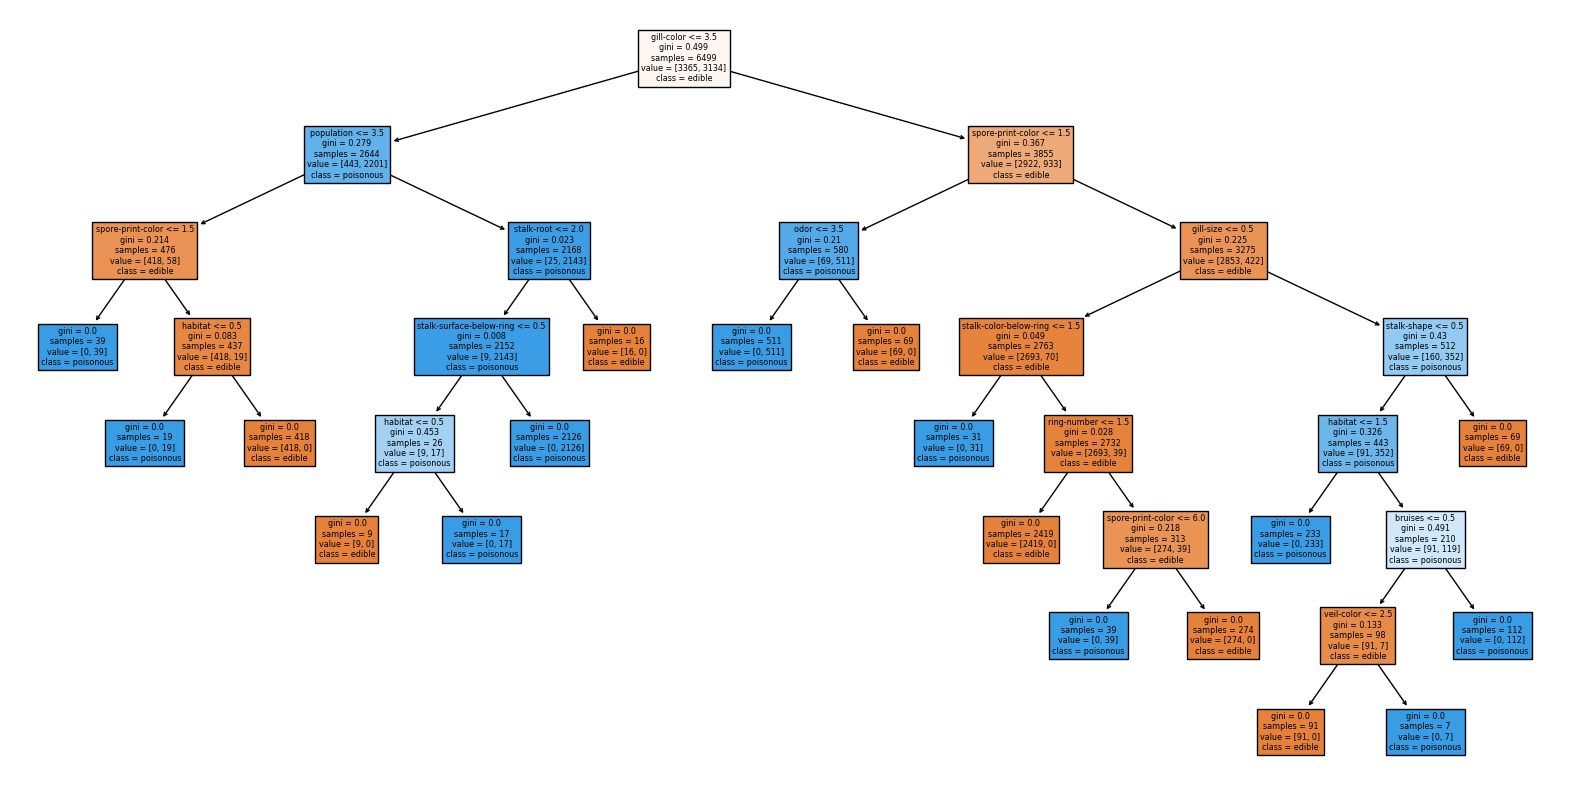

In [7]:
# Visualizing the Trained Decision Tree

import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize=(20,10))

# Plot the decision tree
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)

# Show the plot
plt.show()

In [8]:
# saving the Trained Decision Tree Model

import pickle

# Save the model to a file
model_filename = 'decision_tree_model.pkl'
pickle.dump(decision_tree,open(model_filename, 'wb'))

print(f"Model saved to {model_filename}")

Model saved to decision_tree_model.pkl
